In [18]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
glass = pd.read_csv("glass.csv")
glass_train = glass[glass.index % 5 != 0].reset_index(drop = True)
glass_validation = glass[glass.index % 5 == 0].reset_index(drop = True)

glass_train_x = glass_train[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
glass_validation_x = glass_validation[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
glass_train_x = preprocessing.MinMaxScaler().fit_transform(glass_train_x)
glass_validation_x = preprocessing.MinMaxScaler().fit_transform(glass_validation_x)

glass_train_y = pd.get_dummies(glass_train.Type, prefix='Type').to_numpy()
glass_validation_y = pd.get_dummies(glass_validation.Type, prefix='Type').to_numpy()
print(glass_train_x)
print(glass_train_y)
print(glass_validation_x)
print(glass_validation_y)

[[0.28358209 0.47518797 0.90452261 ... 0.19615385 0.         0.        ]
 [0.22080773 0.42105263 0.8919598  ... 0.19134615 0.         0.        ]
 [0.285777   0.37293233 0.92713568 ... 0.23365385 0.         0.        ]
 ...
 [0.41703248 0.54586466 0.         ... 0.25480769 0.52063492 0.        ]
 [0.23529412 0.54887218 0.         ... 0.25865385 0.4984127  0.        ]
 [0.26163301 0.52631579 0.         ... 0.27211538 0.53015873 0.        ]]
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]
[[0.63274625 0.61479592 1.         0.2718894  0.01071429 0.03409091
  0.35891892 0.         0.        ]
 [0.30332681 0.39795918 0.80400891 0.51152074 0.43571429 0.36363636
  0.28540541 0.         0.74285714]
 [0.28701892 0.38010204 0.77060134 0.48387097 0.51785714 0.38068182
  0.28756757 0.         0.68571429]
 [0.4109589  0.40306122 0.78841871 0.33179724 0.53214286 0.32954545
  0.32       0.         0.        ]
 [0.40378343 0.40561224 0.79064588 0.4516129

In [19]:
print(len(glass_train_y[0]))

6


In [53]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation='sigmoid', input_shape = (len(glass_train_x[0]), )))
model.add(tf.keras.layers.Dense(len(glass_train_y[0]), activation='softmax'))

#model.compile(optimizer='adam', loss='binary_crossentropy')
model.compile(tf.optimizers.RMSprop(0.001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

        
history = model.fit(glass_train_x, glass_train_y, epochs=600, validation_data=(glass_validation_x, glass_validation_y))

predictions = model.predict(glass_validation_x)

Epoch 1/600
6/6 [==============================] - 0s 21ms/step - loss: 1.8358 - categorical_accuracy: 0.1579 - val_loss: 1.7859 - val_categorical_accuracy: 0.3488
Epoch 2/600
6/6 [==============================] - 0s 3ms/step - loss: 1.7618 - categorical_accuracy: 0.3509 - val_loss: 1.7313 - val_categorical_accuracy: 0.3721
Epoch 3/600
6/6 [==============================] - 0s 4ms/step - loss: 1.7182 - categorical_accuracy: 0.3509 - val_loss: 1.6944 - val_categorical_accuracy: 0.3721
Epoch 4/600
6/6 [==============================] - 0s 4ms/step - loss: 1.6867 - categorical_accuracy: 0.3509 - val_loss: 1.6658 - val_categorical_accuracy: 0.3721
Epoch 5/600
6/6 [==============================] - 0s 5ms/step - loss: 1.6599 - categorical_accuracy: 0.3509 - val_loss: 1.6350 - val_categorical_accuracy: 0.3721
Epoch 6/600
6/6 [==============================] - 0s 4ms/step - loss: 1.6342 - categorical_accuracy: 0.3509 - val_loss: 1.6098 - val_categorical_accuracy: 0.3721
Epoch 7/600
6/6 [====

minimal validation loss = 0.9567756056785583


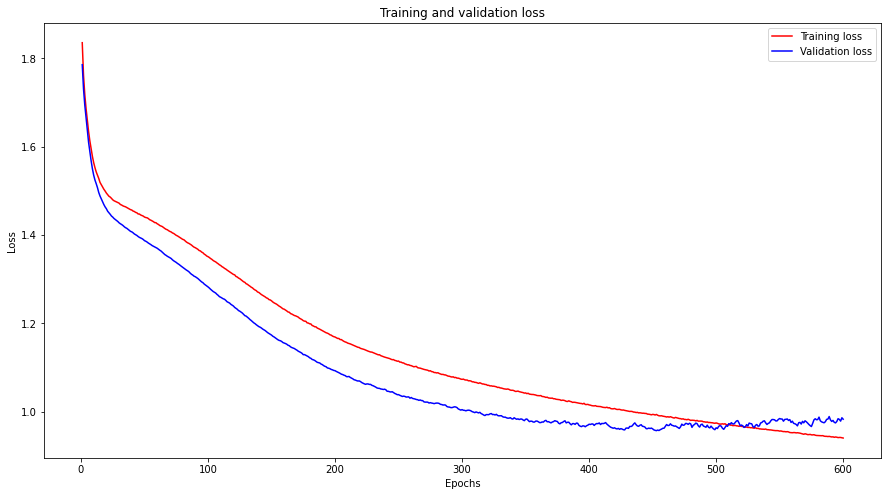

In [54]:
import matplotlib.pyplot as plt
history.history.keys()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(15,8))
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

print(f'minimal validation loss = {min(val_loss)}' )


In [55]:
np.set_printoptions(precision=3, suppress=True)
for di in range(0, len(glass_validation_y)):
    print(
        str(glass_validation_y[di])+"\t"+
        str(predictions[di])

    )

[1 0 0 0 0 0]	[0.631 0.226 0.124 0.004 0.013 0.002]
[1 0 0 0 0 0]	[0.112 0.774 0.045 0.061 0.006 0.002]
[1 0 0 0 0 0]	[0.11  0.765 0.045 0.07  0.007 0.003]
[1 0 0 0 0 0]	[0.302 0.512 0.093 0.054 0.028 0.01 ]
[1 0 0 0 0 0]	[0.167 0.712 0.06  0.05  0.008 0.003]
[1 0 0 0 0 0]	[0.296 0.51  0.094 0.062 0.028 0.01 ]
[1 0 0 0 0 0]	[0.229 0.648 0.07  0.042 0.008 0.002]
[1 0 0 0 0 0]	[0.271 0.497 0.099 0.07  0.044 0.018]
[1 0 0 0 0 0]	[0.339 0.489 0.097 0.047 0.021 0.006]
[1 0 0 0 0 0]	[0.264 0.502 0.1   0.076 0.04  0.017]
[1 0 0 0 0 0]	[0.672 0.225 0.098 0.002 0.003 0.   ]
[1 0 0 0 0 0]	[0.121 0.768 0.043 0.058 0.007 0.003]
[1 0 0 0 0 0]	[0.442 0.365 0.122 0.016 0.045 0.011]
[1 0 0 0 0 0]	[0.477 0.34  0.126 0.013 0.036 0.007]
[0 1 0 0 0 0]	[0.12  0.54  0.079 0.079 0.097 0.084]
[0 1 0 0 0 0]	[0.165 0.551 0.073 0.139 0.043 0.029]
[0 1 0 0 0 0]	[0.048 0.456 0.035 0.343 0.049 0.07 ]
[0 1 0 0 0 0]	[0.204 0.518 0.089 0.091 0.063 0.036]
[0 1 0 0 0 0]	[0.295 0.603 0.077 0.02  0.004 0.001]
[0 1 0 0 0 0